     priceClose                 date  priceHigh  priceLow  priceOpen  \
0       1028.01  2022-10-27T00:00:00    1028.01    990.48     994.82   
1        993.36  2022-10-26T00:00:00    1004.55    984.71    1000.71   
2        997.70  2022-10-25T00:00:00    1011.39    962.45     980.47   
3        986.15  2022-10-24T00:00:00    1023.51    977.41    1021.25   
4       1019.82  2022-10-21T00:00:00    1059.03   1013.69    1059.03   
..          ...                  ...        ...       ...        ...   
595      832.47  2020-06-15T00:00:00     868.16    832.47     867.52   
596      863.52  2020-06-12T00:00:00     863.52    841.44     841.85   
597      867.37  2020-06-11T00:00:00     903.70    867.37     900.48   
598      900.00  2020-06-10T00:00:00     902.69    890.30     898.78   
599      899.43  2020-06-09T00:00:00     904.89    898.87     902.26   

            dt  
0   2022-10-27  
1   2022-10-26  
2   2022-10-25  
3   2022-10-24  
4   2022-10-21  
..         ...  
595 2020-06-15  

/tmp/ipykernel_39712/117765915.py:49: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  short_rolling = priceClose.rolling(window=20).mean()
/tmp/ipykernel_39712/117765915.py:52: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  long_rolling = priceClose.rolling(window=100).mean()


,priceClose,date,priceHigh,priceLow,priceOpen
dt,,,,,
2020-06-09,899.43,2020-06-09T00:00:00,904.89,898.87,902.26
2020-06-10,900.00,2020-06-10T00:00:00,902.69,890.30,898.78
2020-06-11,867.37,2020-06-11T00:00:00,903.70,867.37,900.48
2020-06-12,863.52,2020-06-12T00:00:00,863.52,841.44,841.85
2020-06-15,832.47,2020-06-15T00:00:00,868.16,832.47,867.52


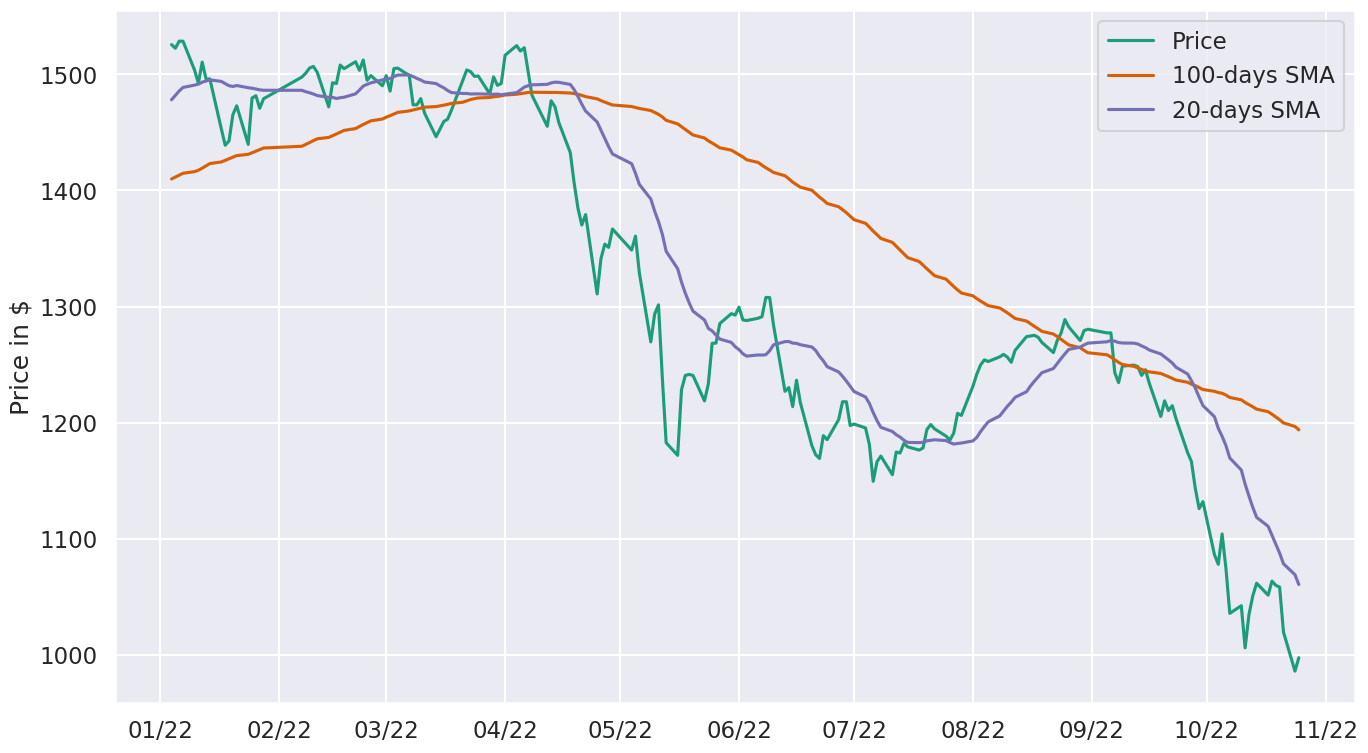

In [2]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('vnindex.csv')

import plotly.graph_objects as go


priceClose = df[['priceClose','date','priceHigh','priceLow','priceOpen']]
priceClose = priceClose[0:600]
priceClose['dt'] =  pd.to_datetime(priceClose['date'],format= '%Y-%m-%dT%H:%M:%S' )

print(priceClose)
# priceClose.set_index('dt', inplace=True)

# fig = go.Figure(data=[go.Candlestick(x=priceClose['dt'],
#                 open=priceClose['priceOpen'],
#                 high=priceClose['priceHigh'],
#                 low=priceClose['priceLow'],
#                 close=priceClose['priceClose'])])

# fig.update_layout(
#     autosize=True,
#     height=1500,    
#     margin=dict(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=4
#     ),
#     paper_bgcolor="LightSteelBlue",
# )

# # print(fig.)
# fig.show()


import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')
priceClose.set_index('dt', inplace=True)
priceClose=priceClose.sort_index()
short_rolling = priceClose.rolling(window=20).mean()
short_rolling.head(20)

long_rolling = priceClose.rolling(window=100).mean()
long_rolling.tail()



start_date = '2022-01-01'
end_date = '2022-10-25'

df.reset_index(drop=True)
# priceClose.set_index('dt');




print(priceClose.index)
print(df.index)

print(priceClose[:].index)

fig, ax = plt.subplots(figsize=(16,9))


ax.plot(priceClose.loc[start_date:end_date, :].index, priceClose.loc[start_date:end_date, 'priceClose'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'priceClose'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'priceClose'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)
# df.

# print(priceClose.loc[start_date:end_date, 'date'])

priceClose.head()


DatetimeIndex(['2007-11-15 00:00:00+00:00', '2007-11-16 00:00:00+00:00',
               '2007-11-19 00:00:00+00:00', '2007-11-20 00:00:00+00:00',
               '2007-11-21 00:00:00+00:00', '2007-11-22 00:00:00+00:00',
               '2007-11-23 00:00:00+00:00', '2007-11-26 00:00:00+00:00',
               '2007-11-27 00:00:00+00:00', '2007-11-28 00:00:00+00:00',
               ...
               '2022-12-13 00:00:00+00:00', '2022-12-14 00:00:00+00:00',
               '2022-12-15 00:00:00+00:00', '2022-12-16 00:00:00+00:00',
               '2022-12-19 00:00:00+00:00', '2022-12-20 00:00:00+00:00',
               '2022-12-21 00:00:00+00:00', '2022-12-22 00:00:00+00:00',
               '2022-12-23 00:00:00+00:00', '2022-12-26 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='dt', length=3767, freq=None)
RangeIndex(start=0, stop=3767, step=1)
DatetimeIndex(['2007-11-15 00:00:00+00:00', '2007-11-16 00:00:00+00:00',
               '2007-11-19 00:00:00+00:00', '2007-11-20 00:0

/tmp/ipykernel_39712/1507428392.py:62: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')

/tmp/ipykernel_39712/1507428392.py:65: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')



,date,dealVolume,priceAverage,priceBasic,priceClose,priceHigh,priceLow,priceOpen,maxPriceHigh,minPriceLow
dt,,,,,,,,,,
2007-11-15 00:00:00+00:00,2007-11-15T00:00:00.000Z,1306330,2.642051,0.000000,2.642051,2.704461,2.267587,2.704461,2.704461,0.0
2007-11-16 00:00:00+00:00,2007-11-16T00:00:00.000Z,248510,2.517229,2.642051,2.517229,2.517229,2.517229,2.517229,0.000000,0.0
2007-11-19 00:00:00+00:00,2007-11-19T00:00:00.000Z,120480,2.392408,2.517229,2.392408,2.392408,2.392408,2.392408,0.000000,0.0
2007-11-20 00:00:00+00:00,2007-11-20T00:00:00.000Z,58710,2.288390,2.392408,2.288390,2.288390,2.288390,2.288390,0.000000,0.0
2007-11-21 00:00:00+00:00,2007-11-21T00:00:00.000Z,728080,2.371605,2.288390,2.371605,2.371605,2.184373,2.184373,0.000000,0.0


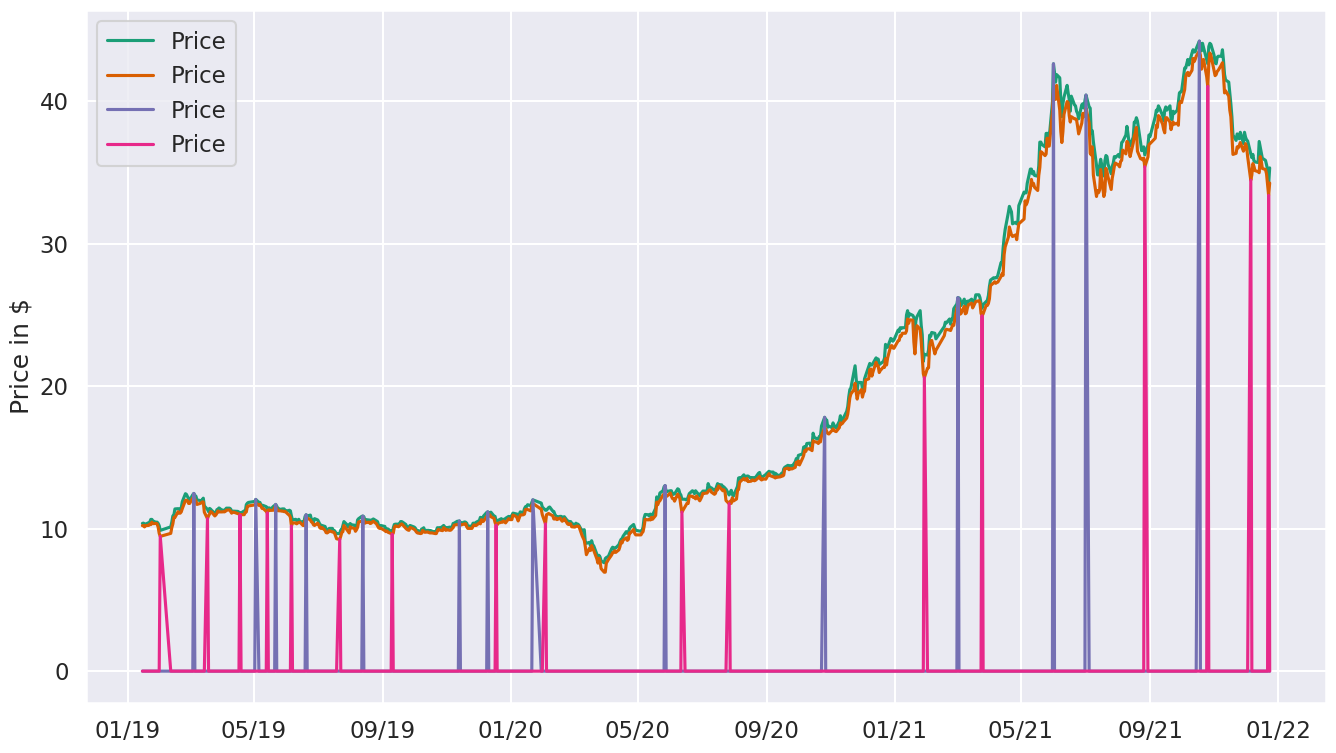

In [35]:
import numpy as np
df = pd.read_csv('../name/minmax.csv')

import plotly.graph_objects as go


priceClose = df[["date","dealVolume","priceAverage","priceBasic","priceClose","priceHigh","priceLow","priceOpen","maxPriceHigh","minPriceLow"]]

# priceClose = priceClose[0:200]

# print(priceClose.size)
priceClose['dt'] =  pd.to_datetime(priceClose['date'],format= '%Y-%m-%dT%H:%M:%S' )

priceClose


index = 0
# while index < len(priceClose): 
#     index += 1
#     # print(priceClose["maxPriceHigh"][index])
#     if priceClose["maxPriceHigh"][index] == 0:
#         priceClose["maxPriceHigh"][index] = None        
#     if priceClose["minPriceLow"][index] == 0:
#        priceClose["minPriceLow"][index] = None;        
       

priceClose.head()

# priceClose.set_index('dt', inplace=True)

# fig = go.Figure(data=[go.Candlestick(x=priceClose['dt'],
#                 open=priceClose['priceOpen'],
#                 high=priceClose['priceHigh'],
#                 low=priceClose['priceLow'],
#                 close=priceClose['priceClose'])])

# fig.update_layout(
#     autosize=True,
#     height=1500,    
#     margin=dict(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=4
#     ),
#     paper_bgcolor="LightSteelBlue",
# )

# # print(fig.)
# fig.show()


import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')
priceClose.set_index('dt', inplace=True)
priceClose=priceClose.sort_index()
short_rolling = priceClose.rolling(window=20).mean()
short_rolling.head(20)

long_rolling = priceClose.rolling(window=100).mean()
long_rolling.tail()



start_date = '2019-01-15'
end_date = '2021-12-25'

df.reset_index(drop=True)
# priceClose.set_index('dt');




print(priceClose.index)
print(df.index)

print(priceClose[:].index)

fig, ax = plt.subplots(figsize=(16,9))


ax.plot(priceClose.loc[start_date:end_date, :].index, priceClose.loc[start_date:end_date, 'priceHigh'], label='Price')
ax.plot(priceClose.loc[start_date:end_date, :].index, priceClose.loc[start_date:end_date, 'priceLow'], label='Price')
ax.plot(priceClose.loc[start_date:end_date, :].index, priceClose.loc[start_date:end_date, 'maxPriceHigh'], label='Price')
ax.plot(priceClose.loc[start_date:end_date, :].index, priceClose.loc[start_date:end_date, 'minPriceLow'], label='Price')
# ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'priceClose'], label = '100-days SMA')
# ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'priceClose'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)
# df.

# print(priceClose.loc[start_date:end_date, 'date'])

priceClose.head()
